In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 300

In [ ]:
df = pd.read_csv("datasets/glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
df1 = df.drop('Type', axis=1)

MinMaxScaler = MinMaxScaler()
df_minmax = MinMaxScaler.fit_transform(df1)
df_minmax = pd.DataFrame(data=df_minmax, columns=df1.columns)

df_minmax.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.0,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.0,0.0


In [ ]:
pca = PCA(n_components=9)
df_pca = pca.fit_transform(df_minmax)

df_pca = pd.DataFrame(data=df_pca, columns = ['C1','C2','C3','C4','C5','C6','C7','C8','C9'])

np.round_(pca.explained_variance_ratio_,3)

array([0.454, 0.18 , 0.126, 0.098, 0.069, 0.042, 0.026, 0.004, 0.   ])

In [ ]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_minmax)

df_pca = pd.DataFrame(data=df_pca, columns = ['C1','C2'])

df_pca.head()

,C1,C2
0,-0.402106,0.032707
1,-0.206320,-0.144705
2,-0.188617,-0.194854
3,-0.237208,-0.097064
4,-0.223972,-0.121779


<AxesSubplot:xlabel='C1', ylabel='C2'>

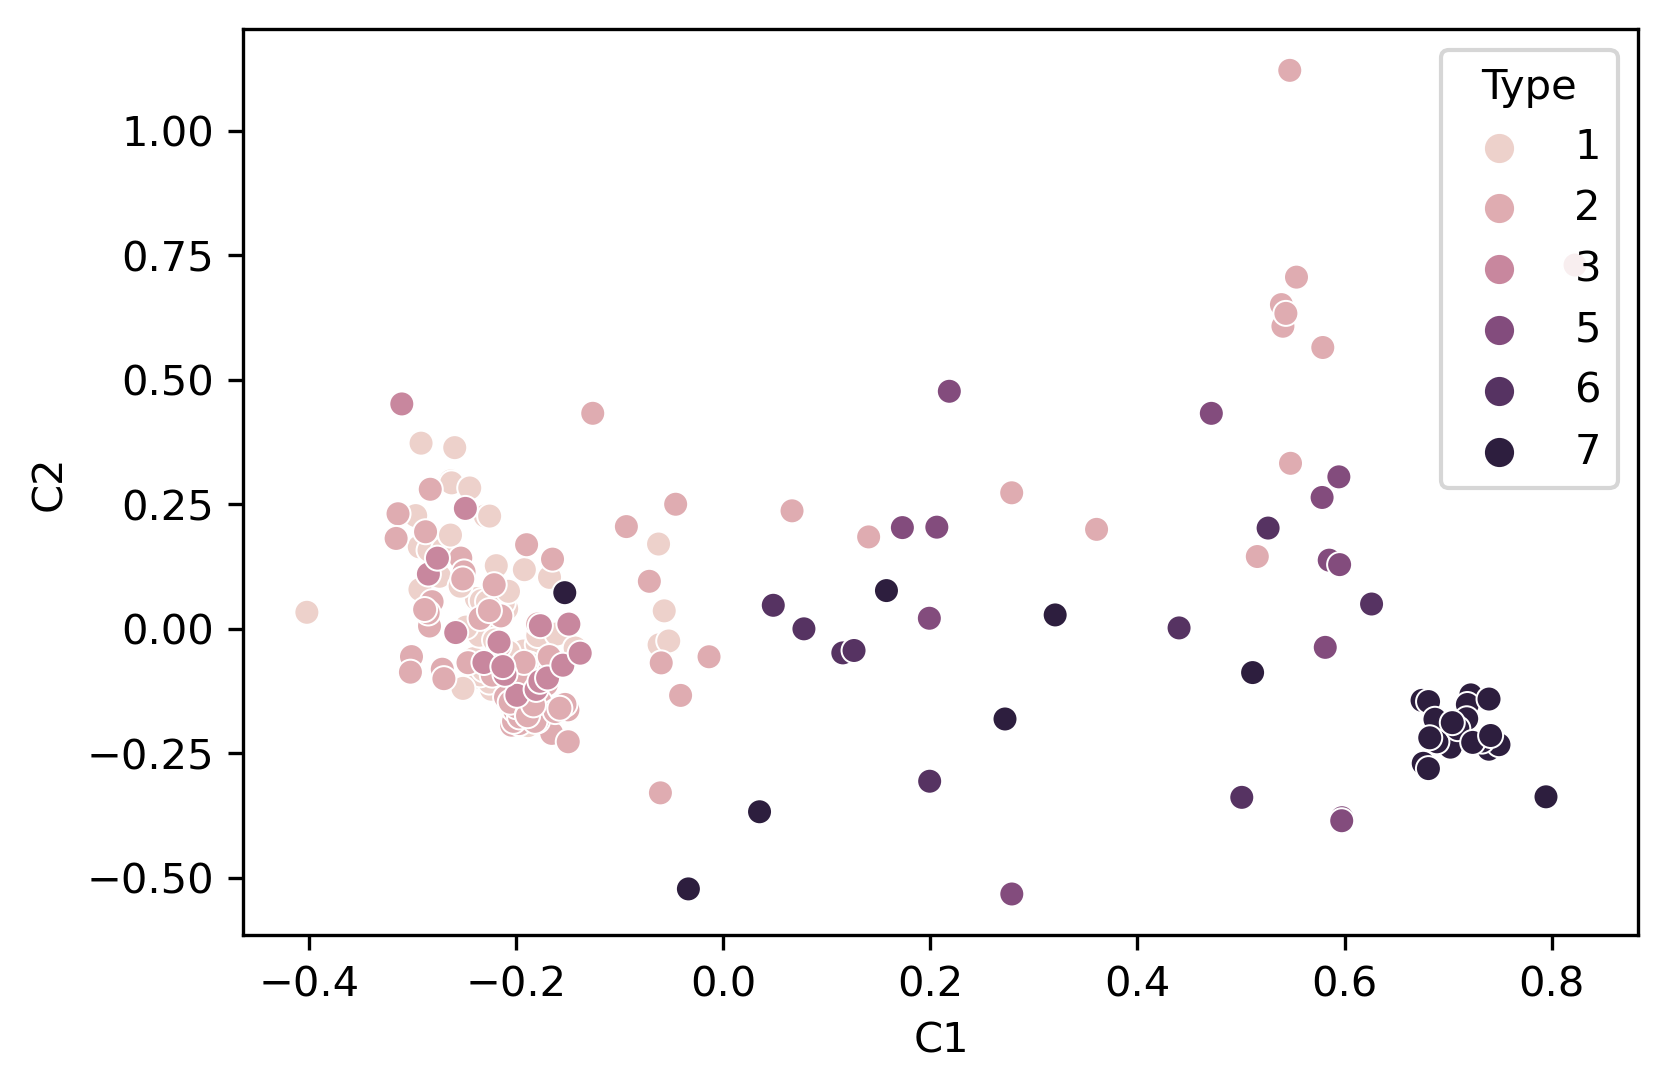

In [ ]:
df_concat = pd.concat([df_pca,df[['Type']]],axis=1)

sns.scatterplot(data=df_concat,x='C1',y='C2',hue='Type')

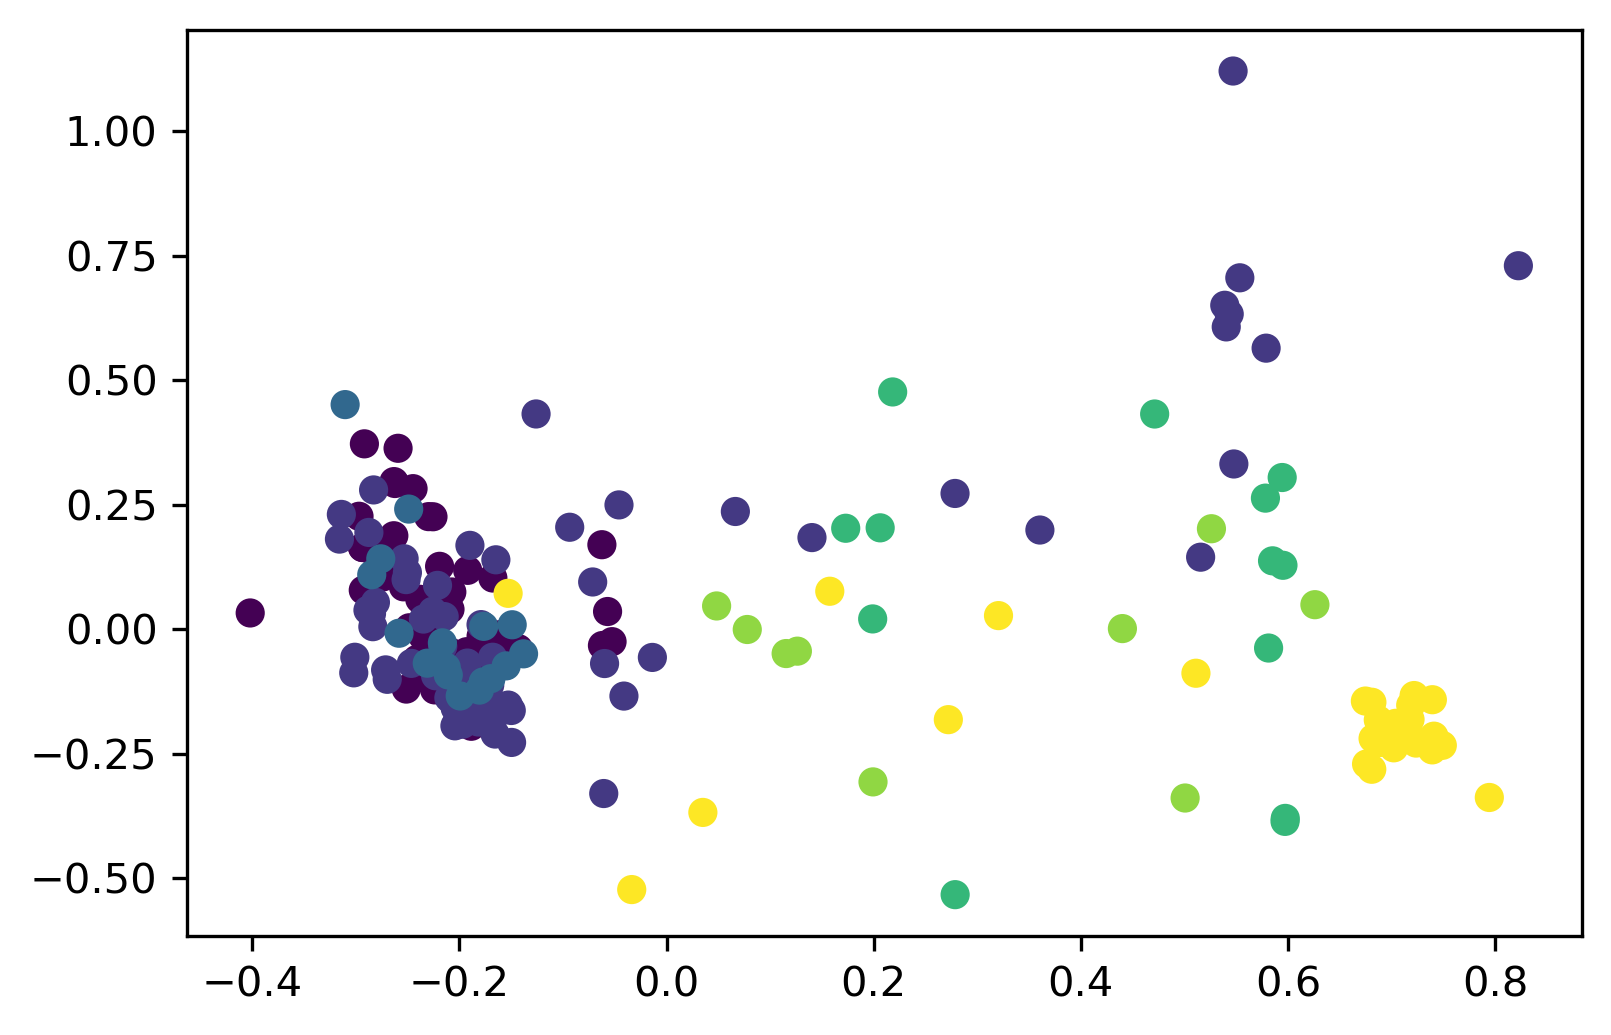

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=df_concat['C1'],y=df_concat['C2'],c=df_concat['Type'])

In [ ]:
!pip install factor-analyzer
from sklearn.preprocessing import MinMaxScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 300

In [ ]:
df = pd.read_csv("datasets/nba2021_advanced.csv")
df.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Precious Achiuwa,PF,21,MIA,28,408,15.1,0.599,0.000,0.541,...,16.1,19.7,0.3,0.6,0.9,0.101,-2.8,-0.2,-3.0,-0.1
1,Jaylen Adams,PG,24,MIL,6,17,-6.9,0.125,0.250,0.000,...,0.0,19.7,-0.1,0.0,-0.1,-0.265,-15.6,-5.2,-20.9,-0.1
2,Steven Adams,C,27,NOP,27,760,15.9,0.592,0.006,0.397,...,20.1,12.8,1.2,0.5,1.7,0.109,-0.1,-1.0,-1.1,0.2
3,Bam Adebayo,C,23,MIA,26,873,22.7,0.641,0.015,0.469,...,16.2,24.6,2.3,1.3,3.6,0.196,2.9,2.0,4.9,1.5
4,LaMarcus Aldridge,C,35,SAS,18,480,15.2,0.542,0.298,0.093,...,6.4,22.3,0.2,0.5,0.7,0.075,0.3,-1.0,-0.7,0.2


In [ ]:
df1 = df.drop(['Player','Pos','Tm','Age'], axis='columns')

MinMaxScaler = MinMaxScaler()
df_minmax = MinMaxScaler.fit_transform(df1)
df_minmax = pd.DataFrame(data=df_minmax, columns=df1.columns)

df_minmax.head()

,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,0.931034,0.369427,0.703518,0.399333,0.000,0.202850,0.300000,0.365989,0.550000,0.143158,...,0.161,0.450382,0.245902,0.318182,0.239437,0.836054,0.688192,0.552147,0.677419,0.146341
1,0.172414,0.013649,0.427136,0.083333,0.250,0.000000,0.000000,0.336414,0.335714,0.282105,...,0.000,0.450382,0.180328,0.045455,0.098592,0.587075,0.452030,0.245399,0.402458,0.146341
2,0.896552,0.689718,0.713568,0.394667,0.006,0.148856,0.482857,0.332717,0.625000,0.212632,...,0.201,0.274809,0.393443,0.272727,0.352113,0.841497,0.738007,0.503067,0.706605,0.219512
3,0.862069,0.792539,0.798995,0.427333,0.015,0.175853,0.194286,0.428835,0.550000,0.587368,...,0.162,0.575064,0.573770,0.636364,0.619718,0.900680,0.793358,0.687117,0.798771,0.536585
4,0.586207,0.434941,0.704774,0.361333,0.298,0.034871,0.091429,0.258780,0.300000,0.240000,...,0.064,0.516539,0.229508,0.272727,0.211268,0.818367,0.745387,0.503067,0.712750,0.219512


In [ ]:
chi_square_value,p_value=calculate_bartlett_sphericity(df_minmax)
chi_square_value, p_value

(20195.698680942383, 0.0)

In [ ]:
kmo_all,kmo_test=calculate_kmo(df_minmax)
kmo_test

C:\ProgramData\Anaconda3\lib\site-packages\factor_analyzer\utils.py:249: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


0.7008950495577879

In [ ]:
fa = FactorAnalyzer(n_factors=30,rotation=None)
fa.fit(df_minmax)
ev, v = fa.get_eigenvalues()

np.round_(ev,2)

array([7.91, 3.53, 2.25, 1.59, 1.45, 1.05, 0.86, 0.67, 0.59, 0.57, 0.45,
       0.37, 0.24, 0.17, 0.11, 0.08, 0.07, 0.03, 0.01, 0.  , 0.  , 0.  ])

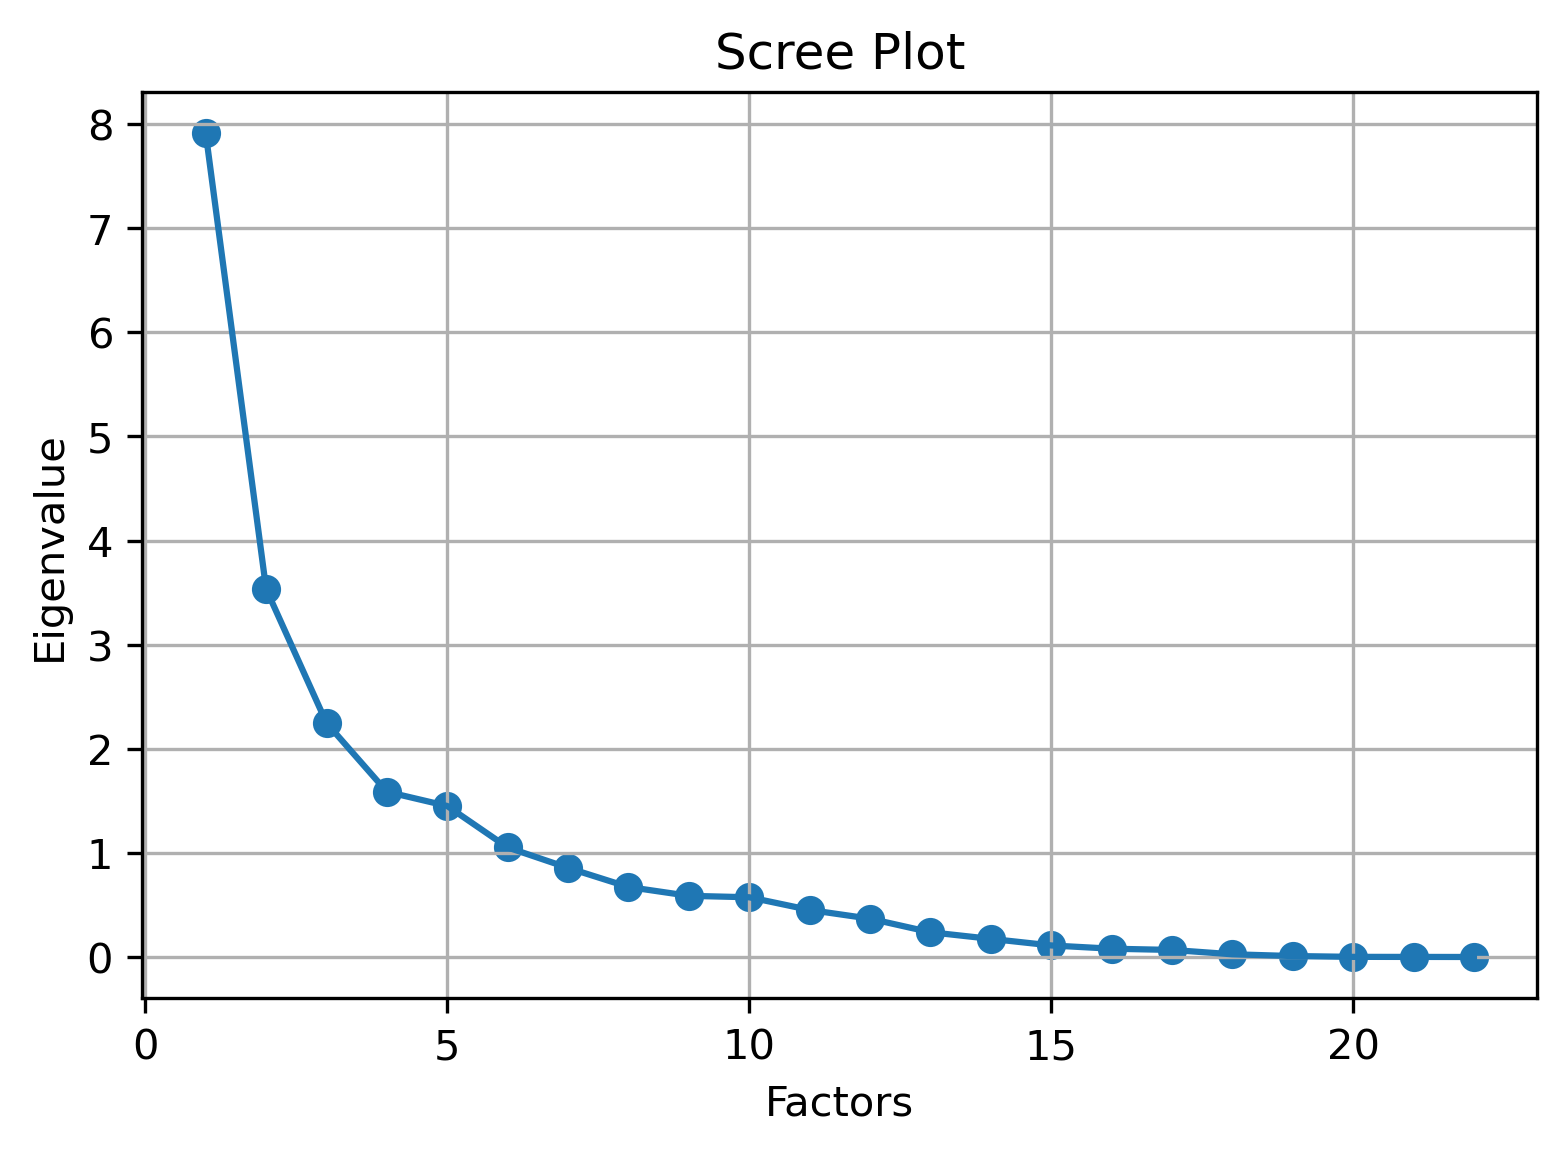

In [ ]:
plt.scatter(range(1,df_minmax.shape[1]+1),ev)
plt.plot(range(1,df_minmax.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
fa = FactorAnalyzer(n_factors=4, rotation="varimax")
fa.fit(df_minmax)
factor_loadings = pd.DataFrame(fa.loadings_, index=df_minmax.columns)
factor_loadings

,0,1,2,3
G,0.280363,-0.120974,0.823695,0.054468
MP,0.235239,-0.114616,0.820694,0.349032
PER,0.832268,0.305573,0.147761,0.411650
TS%,0.746473,0.103235,0.151836,0.069871
3PAr,-0.015289,-0.593922,0.004644,-0.180311
FTr,0.087057,0.356382,-0.173463,0.112161
ORB%,0.042655,0.785599,-0.047214,-0.058840
DRB%,0.105775,0.711622,0.131665,-0.009666
TRB%,0.076869,0.971609,0.092116,-0.049174
AST%,0.072484,-0.176681,0.082553,0.571263


<AxesSubplot:>

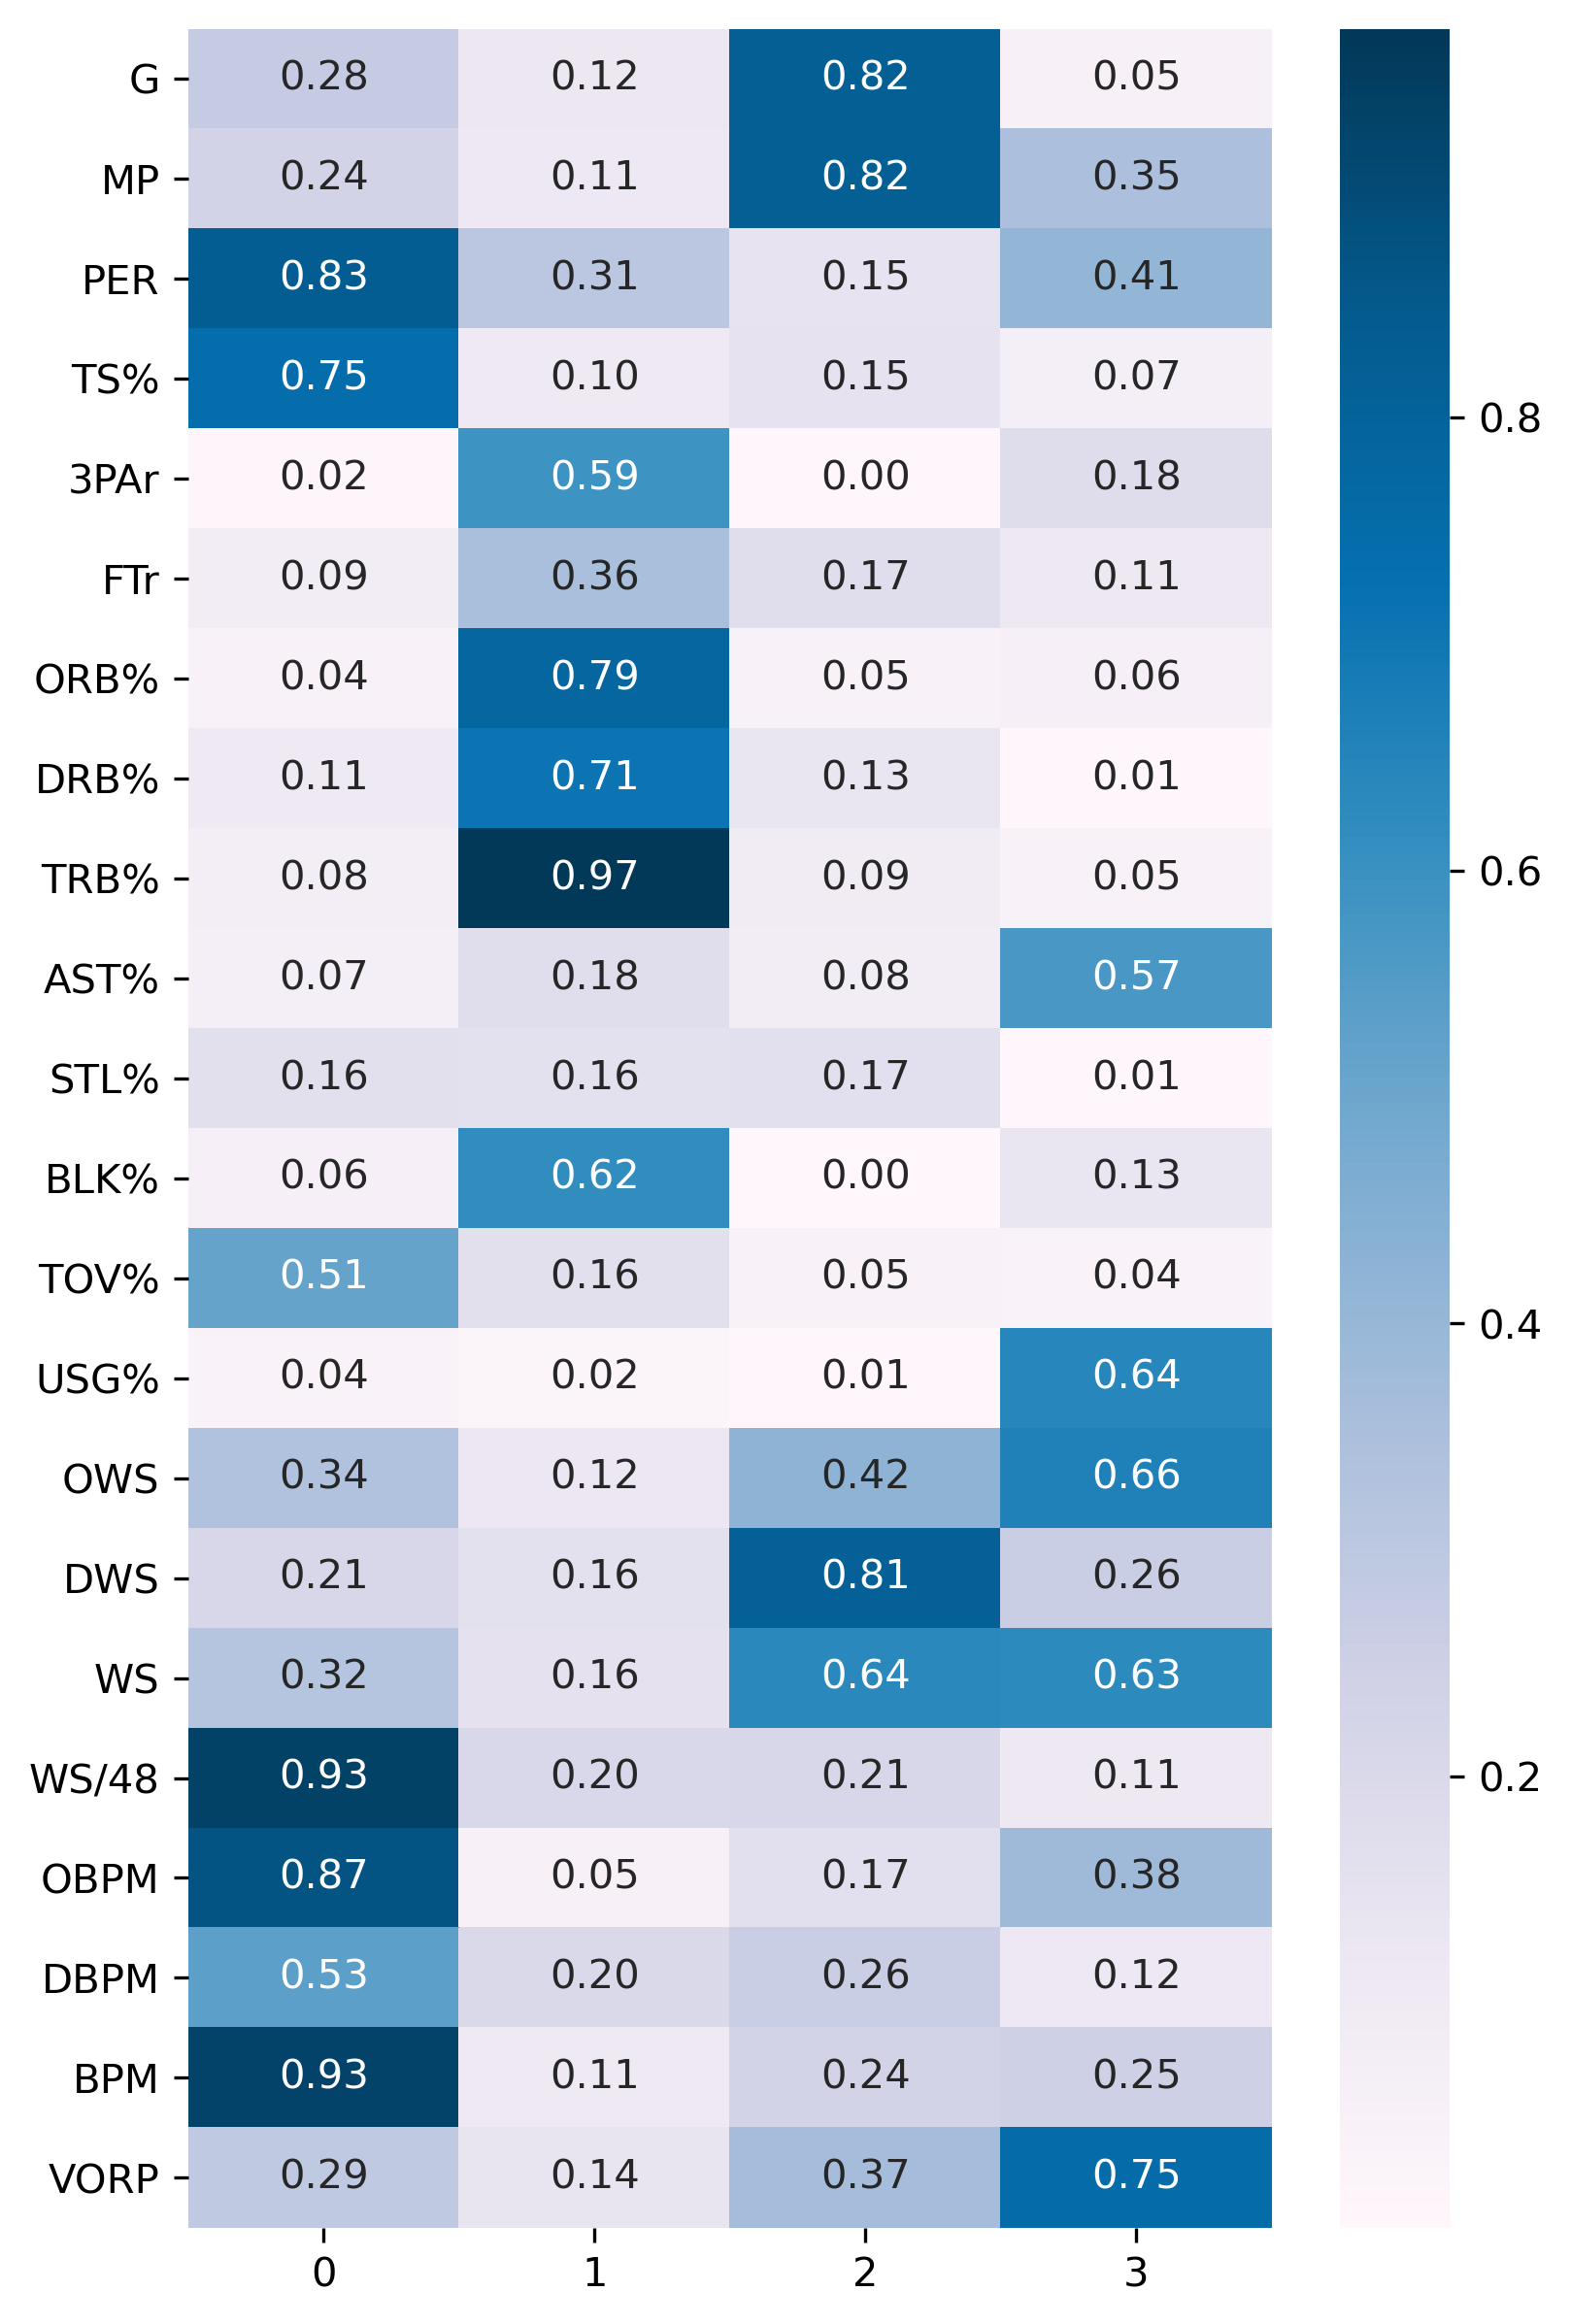

In [ ]:
plt.figure(figsize=(6,10))
sns.heatmap(abs(factor_loadings), cmap="PuBu", annot=True, fmt='.2f')

In [ ]:
from scipy.stats import shapiro
from statsmodels.stats.weightstats import ztest as ztest
import scipy.stats
from scipy import stats
from scipy.stats import ttest_ind
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 300

In [ ]:
df = pd.read_csv("datasets/Golf_test.csv")
df.head()

,TypeA_before,TypeA_after,TypeB_before,TypeB_after,TypeC_before,TypeC_after
0,277,264,265,268,267,268
1,269,261,264,267,264,269
2,263,267,269,272,283,283
3,266,272,274,277,287,266
4,262,258,261,264,275,266


In [ ]:
df.describe()

,TypeA_before,TypeA_after,TypeB_before,TypeB_after,TypeC_before,TypeC_after
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,268.460000,270.720000,273.600000,276.100000,270.360000,271.040000
std,9.817124,8.487782,8.566665,8.493094,8.385507,9.437139
min,250.000000,255.000000,258.000000,261.000000,255.000000,253.000000
25%,262.000000,264.000000,266.250000,269.000000,263.250000,265.000000
50%,266.000000,271.000000,273.500000,276.500000,268.500000,268.000000
75%,275.750000,275.000000,278.000000,280.000000,275.750000,277.750000
max,289.000000,289.000000,292.000000,295.000000,289.000000,291.000000


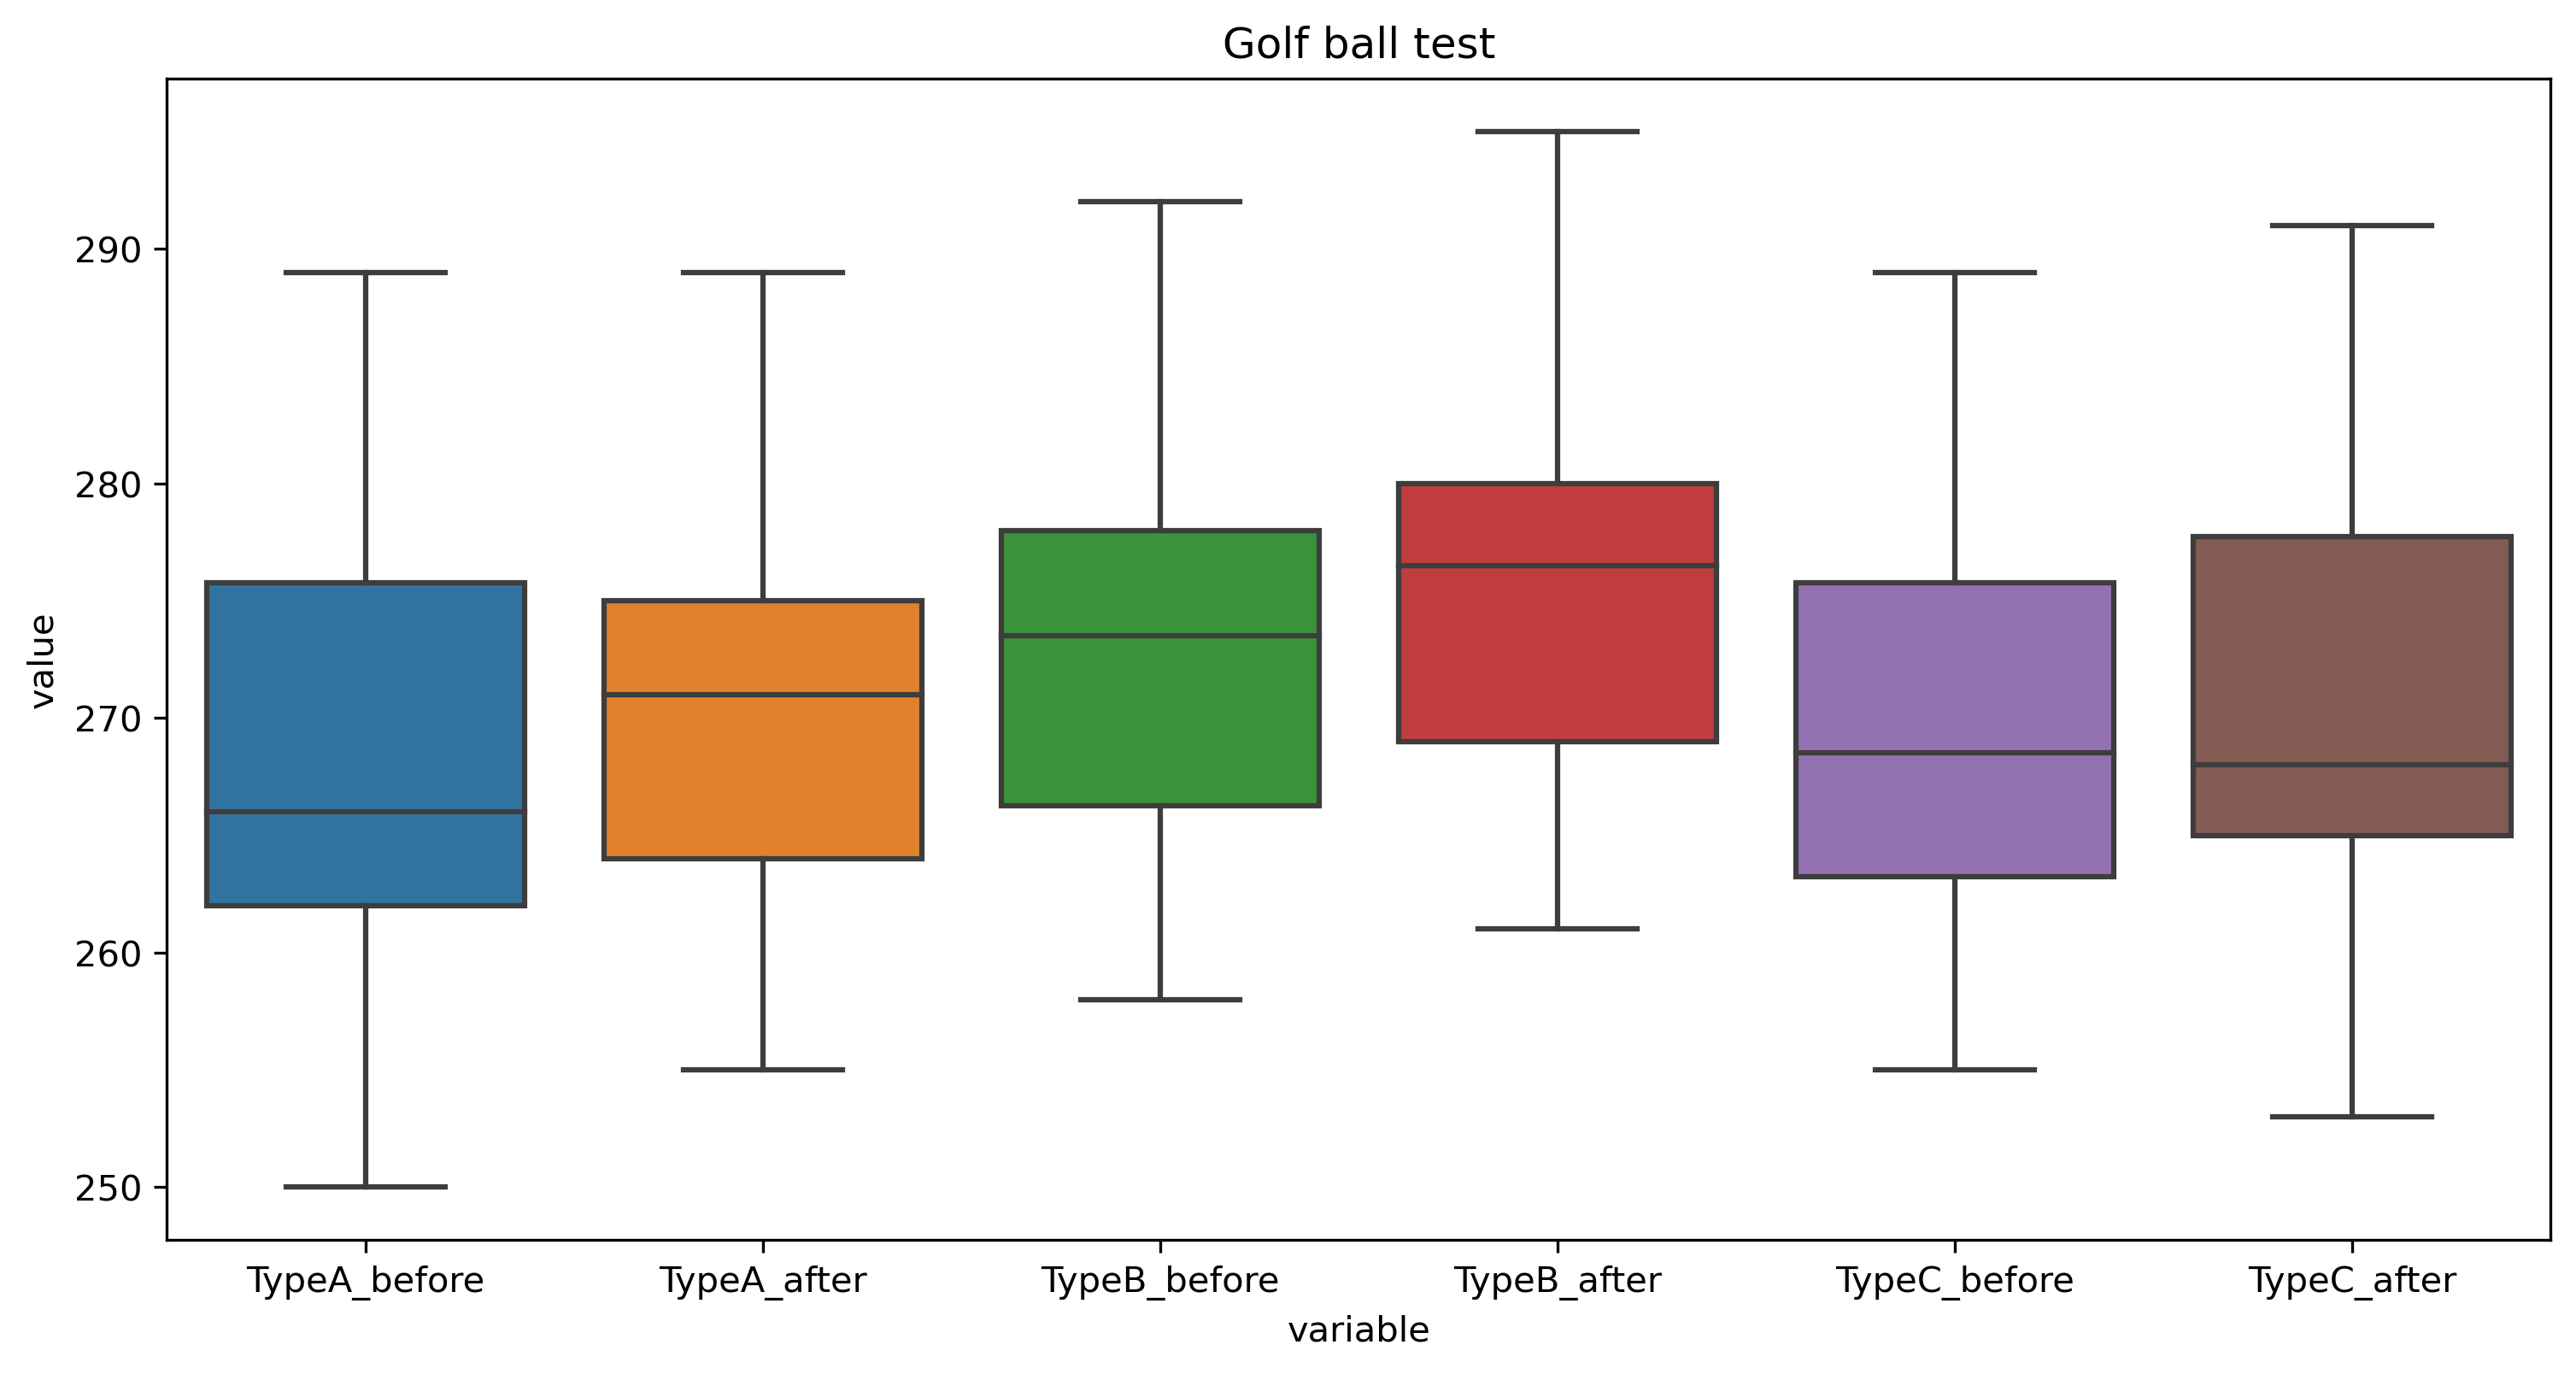

In [ ]:
df2 =  pd.melt(df)
plt.figure(figsize=(12,6))
sns.boxplot(x='variable', y='value', data=df2)
plt.title('Golf ball test')
plt.show()

In [ ]:
print(shapiro(df['TypeA_before']))
print(shapiro(df['TypeA_after']))
print(shapiro(df['TypeB_before']))
print(shapiro(df['TypeB_after']))
print(shapiro(df['TypeC_before']))
print(shapiro(df['TypeC_after']))

ShapiroResult(statistic=0.965537965297699, pvalue=0.15155252814292908)
ShapiroResult(statistic=0.9728281497955322, pvalue=0.3005155026912689)
ShapiroResult(statistic=0.9730034470558167, pvalue=0.30533552169799805)
ShapiroResult(statistic=0.9693009257316589, pvalue=0.2167525738477707)
ShapiroResult(statistic=0.9595518112182617, pvalue=0.08513051271438599)
ShapiroResult(statistic=0.9469832181930542, pvalue=0.02568192593753338)


In [ ]:
stats.bartlett(df['TypeA_before'],df['TypeA_after'],
               df['TypeB_before'],df['TypeB_after'],
               df['TypeC_before'],df['TypeC_after'])

BartlettResult(statistic=2.232358764161634, pvalue=0.8161484218330712)

In [ ]:
ztest(df['TypeA_before'], x2=df['TypeA_after'], value=0, alternative='two-sided')

(-1.2313987682249838, 0.21817375744980994)

In [ ]:
print(ztest(df['TypeA_before'], x2=df['TypeB_before'], value=0, alternative='two-sided'))

print(ztest(df['TypeA_before'], x2=df['TypeB_before'], value=0, alternative='smaller'))

print(ztest(df['TypeA_before'], x2=df['TypeB_before'], value=0, alternative='larger'))

(-2.789495974658115, 0.005279015267745852)
(-2.789495974658115, 0.002639507633872926)
(-2.789495974658115, 0.9973604923661271)


In [ ]:
scipy.stats.ttest_rel(df['TypeA_before'],df['TypeA_after'])

Ttest_relResult(statistic=-1.221439914972903, pvalue=0.22776376448687602)

In [ ]:
ttest_ind(df['TypeA_before'],df['TypeB_before'], equal_var=False)

Ttest_indResult(statistic=-2.789495974658115, pvalue=0.0063642243501398285)

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scipy.stats
import scipy.stats as stats
from scipy.stats import ttest_ind
import pandas as pd

In [ ]:
df = pd.read_csv("datasets/Golf_test.csv")
df.head()

,TypeA_before,TypeA_after,TypeB_before,TypeB_after,TypeC_before,TypeC_after
0,277,264,265,268,267,268
1,269,261,264,267,264,269
2,263,267,269,272,283,283
3,266,272,274,277,287,266
4,262,258,261,264,275,266


In [ ]:
F_statistic, pVal = stats.f_oneway(df['TypeA_before'],
                                   df['TypeB_before'],
                                   df['TypeC_before'])

print('일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))

일원분산분석 결과 : F=4.2, p=0.01652


In [ ]:
df2 =  pd.melt(df)
df2 = df2[df2['variable'].isin(['TypeA_before', 'TypeB_before', 'TypeC_before'])]

df2.head()

,variable,value
0,TypeA_before,277
1,TypeA_before,269
2,TypeA_before,263
3,TypeA_before,266
4,TypeA_before,262


In [ ]:
model = ols('value ~ C(variable)', df2).fit()
print(anova_lm(model))

                df        sum_sq     mean_sq         F    PR(>F)
C(variable)    2.0    675.453333  337.726667  4.220169  0.016515
Residual     147.0  11763.940000   80.026803       NaN       NaN


      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1       group2    meandiff p-adj   lower  upper  reject
---------------------------------------------------------------
TypeA_before TypeB_before     5.14 0.0129  0.9035 9.3765   True
TypeA_before TypeC_before      1.9 0.5374 -2.3365 6.1365  False
TypeB_before TypeC_before    -3.24 0.1698 -7.4765 0.9965  False
---------------------------------------------------------------


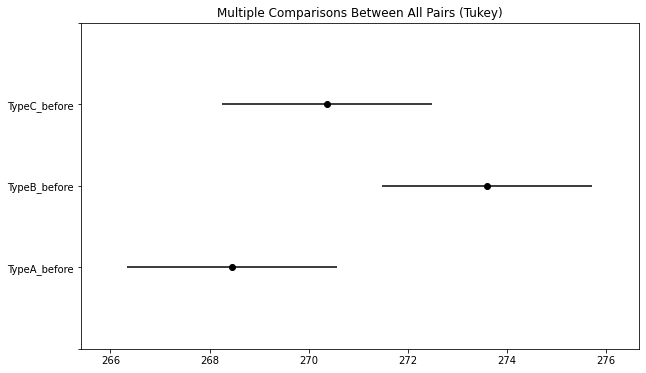

In [ ]:
posthoc = pairwise_tukeyhsd(df2['value'],
                            df2['variable'],
                            alpha=0.05)
print(posthoc)
fig = posthoc.plot_simultaneous()

In [ ]:
import scipy.stats
from scipy.stats import chi2_contingency
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("datasets/smoker.csv")
df.head()

,sex,smoke
0,male,Non-Smoker
1,male,Smoker
2,male,Non-Smoker
3,male,Smoker
4,male,Non-Smoker


In [ ]:
df.groupby(['sex','smoke'])['smoke'].count()

sex     smoke     
female  Non-Smoker    50
        Smoker        12
male    Non-Smoker    40
        Smoker        29
Name: smoke, dtype: int64

In [ ]:
crosstab = pd.crosstab(df.sex, df.smoke)
crosstab

smoke,Non-Smoker,Smoker
sex,,
female,50,12
male,40,29


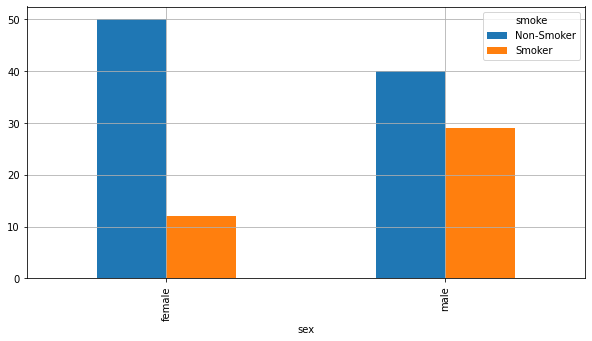

In [ ]:
%matplotlib inline
crosstab.plot(kind='bar', figsize=(10,5))
plt.grid()

In [ ]:
chiresult = chi2_contingency(crosstab, correction=False)
print('Chi square: {}'.format(chiresult[0]))
print('P-value: {}'.format(chiresult[1]))

Chi square: 7.8081404703715105
P-value: 0.005201139711454792
